In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
def ReadImage(img_file):
    img_arr = plt.imread(img_file)
    plt.imshow(img_arr)
    return(img_arr)

(321, 481, 3)


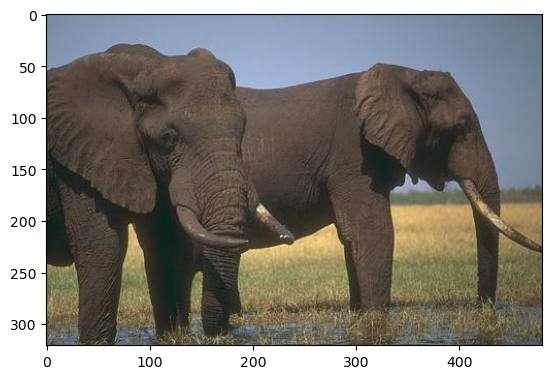

In [2]:
image_arr = ReadImage("test.jpg")
print(image_arr.shape)

In [3]:
img_arr=image_arr.reshape(-1,image_arr.shape[2])
img_arr[1:10]

array([[119, 139, 163],
       [119, 139, 163],
       [119, 139, 163],
       [119, 139, 163],
       [119, 139, 163],
       [119, 139, 163],
       [119, 139, 163],
       [120, 140, 164],
       [120, 140, 164]], dtype=uint8)

In [4]:
def New_cluster(cluster_set,x_t,cov,alpha, coordinate):
    cluster_set.append([x_t,cov,alpha, coordinate])
    return

In [5]:
def Update_Param(index,x_t,cluster_set,t):
    # calculate Beta value of cluster index
    if t < 500:
        alpha_t = 1/t
    else:
        alpha_t = 1/500
    # print('from update param', cluster_set[index][2])
    beta_index = alpha_t/cluster_set[index][2]
    # print('beta_index', beta_index)
    # Update mean
    pre_mean = cluster_set[index][0]
    cluster_set[index][0] = pre_mean*(1-beta_index) + beta_index*(x_t)

    # Update Co-var
    temp=(1 - beta_index)*(cluster_set[index][1] + beta_index*((x_t-pre_mean)@(x_t-pre_mean).T))
    # print(temp)
    det=np.linalg.det(temp)
    if np.all(np.diag(temp) != 0) and det!=0:
      cluster_set[index][1] = temp

    # print(cluster_set[index][1])
    # Update Prior
    cluster_set[index][2] = (1 - 1/t)*cluster_set[index][2] + (1/t)





In [6]:
lam = 3
Max_clusters = 50
plot_iter = 100
cluster_set = []
cov = np.array([[12,0,0],[0,12,0],[0,0,12]]).T
t = 1
New_cluster(cluster_set,img_arr[0],cov,1, [0])
print(cluster_set[0][3])

[0]


In [7]:
for k, x_t in enumerate(img_arr[1:]):
    k+=1
    #print(len(cluster_set))
    # print(x_t, k)
    # x_t = generatePointFromRandomCluster()
    dist = []
    for i in range(len(cluster_set)):
        # print(cluster_set[i])
        # print(np.linalg.inv(cluster_set[i][1]))
        d=(x_t - cluster_set[i][0]).T@np.linalg.inv(cluster_set[i][1])@(x_t - cluster_set[i][0])
        dist.append(d)
    dist = np.array(dist)
    # print(cov)
    cluster_present = any(dist <= lam**2)
    if cluster_present:
        clust_index = np.argmin(dist)
        Update_Param(clust_index,x_t,cluster_set,t)
        cluster_set[clust_index][3].append(k)
        # print(cluster_set[clust_index])
    else:
        if len(cluster_set) < Max_clusters:
            New_cluster(cluster_set,x_t,cov,1/t, [k])
        else:
            min_alpha_index = np.argmin(np.array(cluster_set)[:,2])
            cluster_set.pop(min_alpha_index)
            if t < 500:
                New_cluster(cluster_set,x_t,cov,1/t, [k])
            else:
                New_cluster(cluster_set,x_t,cov,1/500, [k])
    #print(t)
    # if t%100 == 0:
    #     print("\n")
    #     for cluster in cluster_set:
    #         mean = cluster[0]
    #         cov = cluster[1]
    #         u=mean[0]   #x-position of the center
    #         v=mean[1]   #y-position of the center
    #         a=cov[0][0]     #radius on the x-axis
    #         b=cov[1][1]    #radius on the y-axis

    #         t_ = np.linspace(0, 2*np.pi, 100)
    #         plt.plot( u+a*np.cos(t_) , v+b*np.sin(t_) )

    #     plt.grid()
    #     plt.show()
    t+=1
    # print("-"*100)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (50, 4) + inhomogeneous part.

In [ ]:
cluster_set

In [ ]:
print(len(cluster_set))

In [ ]:
print(t)